# Задание
- 1 . Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

- 2 . Подберите параметры модели SARIMAX для этого ряда.

- 3 . Сделайте вывод о том, как изменилась модель по сравнению с недельной.

- 4 . Возмите вариант 1 или 2

Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )
- 5 . Оцените результат моделирования

- 6 . Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

__1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.__

Загрузим файл с данными и посмотрим на таблицу их организующую.

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


Общий вид изменения ключевого свойства ряда приведен на рис.1.

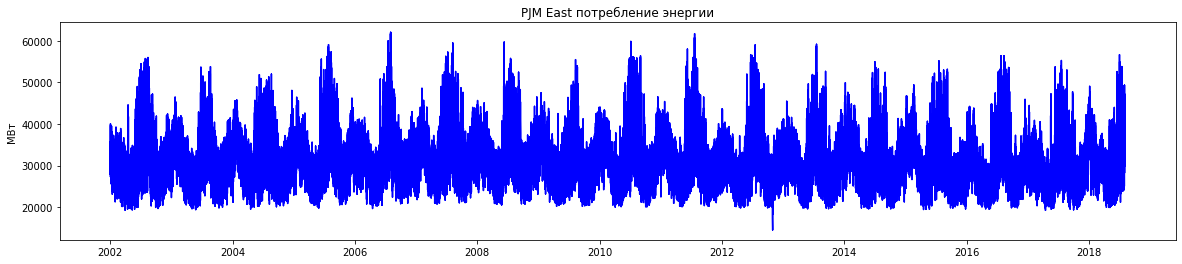

In [4]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

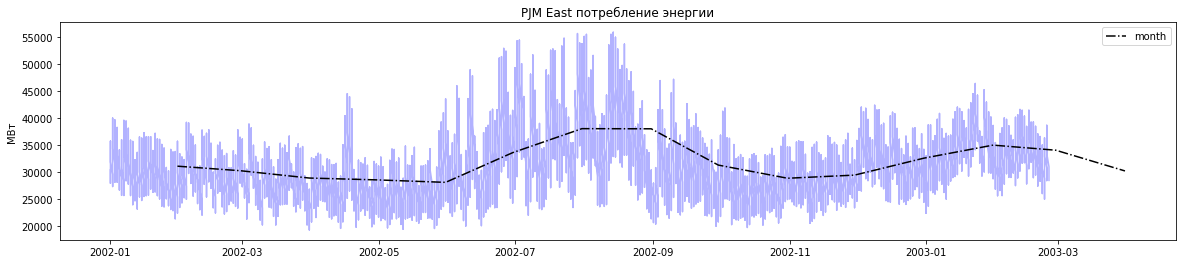

In [5]:
data_d = data.copy().resample('D').mean()
data_m = data.resample('M').mean()


plt.figure(figsize =(20,4))
plt.plot( data.index[:5*24*7*4*3], data['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot( data_m.index[:5*3], data_m['PJME_MW'].values[:5*3], '-.k',label='month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

__2.Подберите параметры модели SARIMAX для этого ряда.__

In [6]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


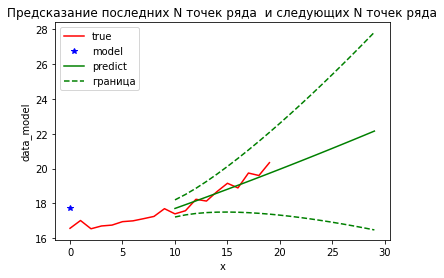

In [44]:
# ARIMA пример
from statsmodels.tsa.arima_model import ARIMA
from random import random
# модельный ряд
np.random.seed(21)
data_model = [x*0.3 +10*np.sin(x/20) + 0.7*np.random.random(1) for x in range(1, 100)]
N=10    # число точек для теста
# строим модель
model = ARIMA(data_model[:-N], order=(1, 1, 2))
model_fit = model.fit(disp=False)
# делаем оценку старых значений
y_p = model_fit.predict(len(data_model[:-N]), len(data_model[:-N]), typ='levels')
y_f = model_fit.forecast(2*N)
plt.plot(data_model[-10-N:],'r',label ='true')
plt.plot(y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

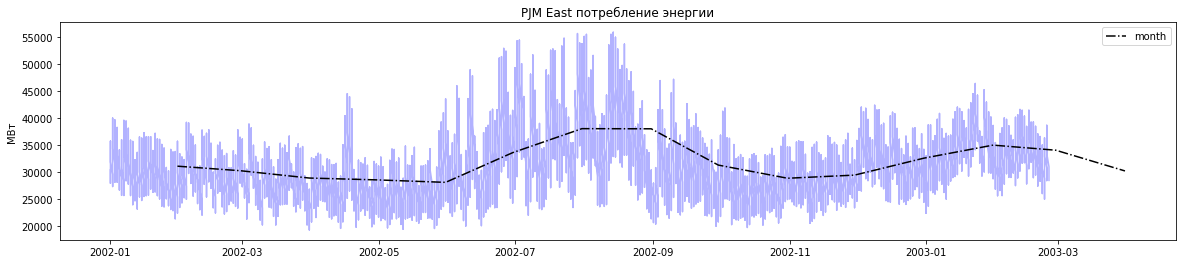

In [45]:
data_d = data.copy().resample('D').mean()
data_m = data.resample('M').mean()


plt.figure(figsize =(20,4))
plt.plot( data.index[:5*24*7*4*3], data['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot( data_m.index[:5*3], data_m['PJME_MW'].values[:5*3], '-.k',label='month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

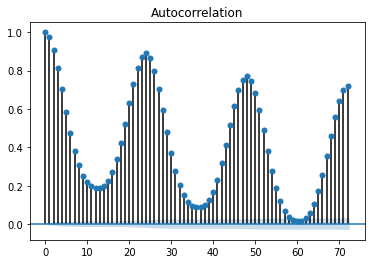

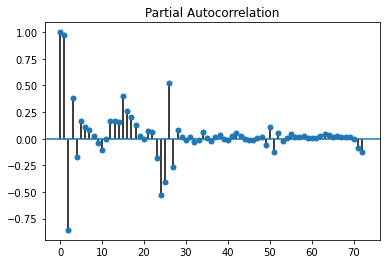

In [46]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data['PJME_MW'].values, lags=36*2)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data['PJME_MW'].values, lags=36*2)
plt.show()

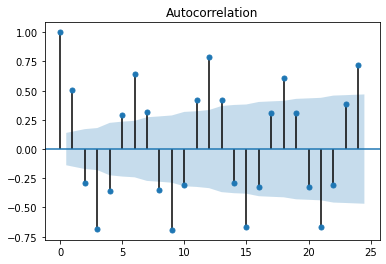

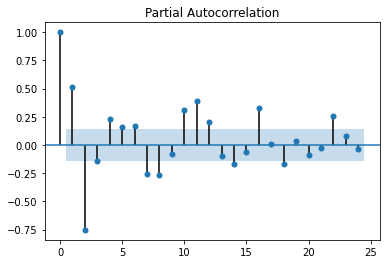

In [49]:
#сделал 12 месяцев, перестроил на 24 и далее q увеличил до 4
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=24)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=24)
plt.show()

In [50]:
import warnings

# Определим p, d и q 
q = 4
p = 1
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с месячными данными, тогда сезонность это 6 месяцев
qs = 1
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs ,6] 


In [51]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [1, 2, 4]    : ps,ds,qs, S= [0, 0, 1, 6]


In [52]:
#для построения модели используем все данные, кроме 12-х последних недель (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-1],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))


SARIMAX[1, 2, 4]x[0, 0, 1, 6] - AIC:3465.939127133189


In [53]:
print(results.summary().tables[0],results.summary().tables[1])

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  199
Model:             SARIMAX(1, 2, 4)x(0, 0, [1], 6)   Log Likelihood               -1725.970
Date:                             Mon, 13 Jul 2020   AIC                           3465.939
Time:                                     16:20:05   BIC                           3488.519
Sample:                                          0   HQIC                          3475.089
                                             - 199                                         
Covariance Type:                               opg                                         
=========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

Анализ результатов по results:
- коэффициенты при элементах модели имеют большие значения (особенно важны составляющие сглаживания coef: ma.L1, ma.L2 , ma.S.L26)
- можно посмотреть на остатки ряда (results.resid) с точки зрения автокорреляции и убедиться, что они не имеют значительной корреляции (это хорошо, т.к. остатки имеют характер белого шума)

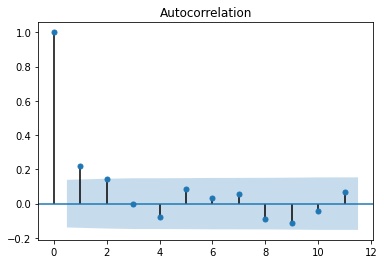

In [54]:
sm.graphics.tsa.plot_acf(results.resid, lags=11)
plt.show()

Оценим близости распределений остатков модели к нормальному закону используя визуализацию plot_diagnostics: 
- левый верхний график - остатки ряда 
- правый верхний - гистограмма для остатков ряда
- левый нижний - упорядоченное распределение остатков (квантильное)
- правый нижний - коррелограмма остатков

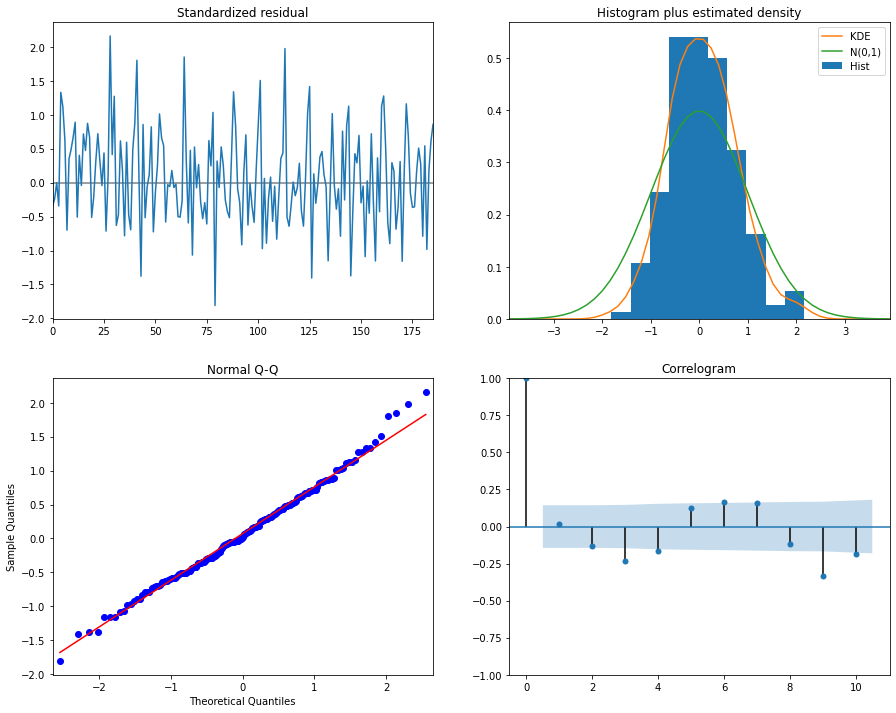

In [55]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


In [17]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [18]:
data_m['PJME_MW'].values.shape

(200,)

In [19]:
warnings.filterwarnings("ignore") # отключает предупреждения
it=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
#         if it>7:
#             break
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[200:-2],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
            it +=1
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:2.0
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4.0
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:6.0
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:10.0
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:6.0
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:10.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)3 - AIC:2.0
ARIMA(0, 1, 0)x(0, 0, 1, 12)3 - AIC:4.0
ARIMA(0, 1, 0)x(0, 0, 2, 12)3 - AIC:6.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)3 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)3 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 2, 12)3 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)3 - AIC:4.

Лучшие результаты на недельных данных параметры модели SARIMA(2,0, 2)x(0, 0, 2, 12) - AIC:14 (для p,q,d,ps,ds,qs из диапазона [0,1,2]).

In [20]:
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[200:-2],order=[2,0,2],
                                seasonal_order=[0,1,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)


AIC:{} 14.0


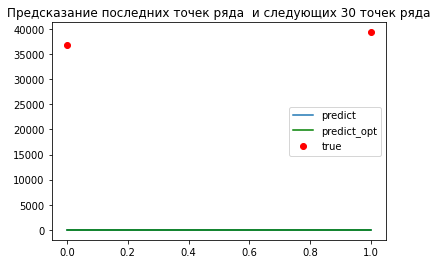

In [21]:
pred_dynamic = results.forecast(2)    #делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(2)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

Видно, что предсказание новых точек тем слабее, чем дальше от последней известной точки ряда. Это можно объяснить тем, что накапливается ошибка предсказания или изменились условия развития ряда (наш котенок перестанет когда-нибудь расти и следовательно его скорость и маневренность долгое время не будут изменяться). Кроме того, модель, которую выбрали по сетке, заметно лучше обходит точки известные нам заранее и имеет более сложный характер. Таким образом, подбор позволил улучшить исходный результат для ряда с сезонами и циклами. 

Повторим процесс для второго ряда "Цена нефти Brent" и посмотрим на особенности моделирования такого ряда. Напомним, что нет сезонности, есть интегральность, есть изменяющиеся во времени тенденции (временные ряды 2).

Дневные графики показывают автокорреляцию цены со всеми значениями ранее (это не очень хорошо) и для на PACF мы видим, что только 1-й порядок разностей важен для нашего процесса (AR 1). Это полностью согласуется с проведенным ранее анализом. Запустим модель без сезонного анализа (ARIMA)

__4. Взял набор данных СOVID_19__

In [22]:
path_brent = 'covid_19_data.csv'
covid_data = pd.read_csv(path_brent,sep = ',', parse_dates=[5])
covid_data = covid_data.loc[(covid_data['Country/Region']=='Thailand'
                            ) & (covid_data['Last Update']>'2020-01-31T10:37:00')
                           ][['Last Update','Confirmed','Deaths','Recovered']]

# covid_data['Last Update'] = covid_data['Last Update'].astype('date')

covid_data = covid_data.groupby('Last Update').agg({'Confirmed': max ,'Deaths': sum , 'Recovered': max})
#

covid_data = covid_data.sort_values(by='Last Update')

covid_data = covid_data.reset_index()

covid_data['Last Update'] = pd.to_datetime(covid_data['Last Update'])

covid_data = covid_data.set_index('Last Update')
covid_data.index = pd.to_datetime(covid_data.index, unit='s')
covid_data['Confirmed'] = covid_data['Confirmed'].astype(float)
covid_data = covid_data.resample('D').mean()

covid_data.head(20)

,Confirmed,Deaths,Recovered
Last Update,,,
2020-02-04,25.0,0.0,5.0
2020-02-05,NaN,NaN,NaN
2020-02-06,NaN,NaN,NaN
2020-02-07,NaN,NaN,NaN
2020-02-08,32.0,0.0,10.0
2020-02-09,NaN,NaN,NaN
2020-02-10,NaN,NaN,NaN
2020-02-11,33.0,0.0,10.0
2020-02-12,NaN,NaN,NaN


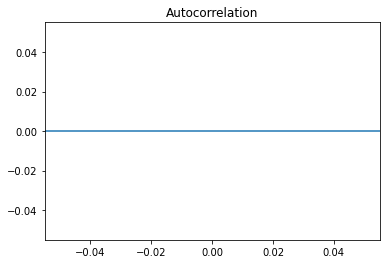

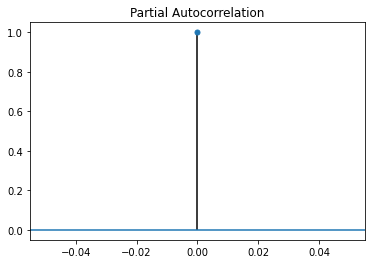

In [24]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(covid_data['Confirmed'].values, lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(covid_data['Confirmed'].values, lags=30)
plt.show()
# 'Last Update','Confirmed'

In [25]:
covid_data.describe()

,Confirmed,Deaths,Recovered
count,47.000000,47.000000,47.000000
mean,769.446809,8.106383,248.202128
std,935.232703,11.788414,366.569565
min,25.000000,0.000000,5.000000
25%,42.000000,0.500000,28.000000
50%,177.000000,1.000000,41.000000
75%,1711.000000,13.500000,423.500000
max,2551.000000,38.000000,1218.000000


Text(0.5, 0, 't')

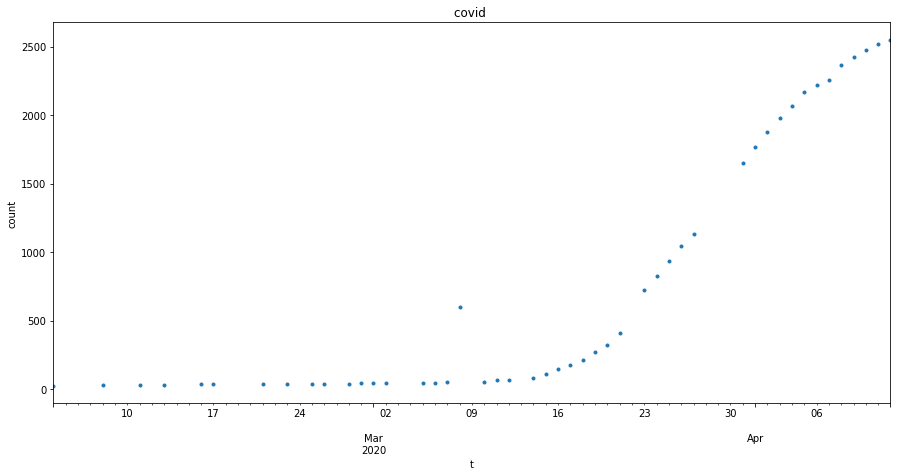

In [26]:
_ = covid_data['Confirmed'].plot( style='.', figsize=( 15, 7 ), title='covid ')
plt.ylabel('count')
plt.xlabel('t')

In [27]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]


warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(covid_data['Confirmed'].values[:-1],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:571.3352973133962
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -279.668
Date:                Mon, 13 Jul 2020   AIC                            571.335
Time:                        16:06:19   BIC                            584.382
Sample:                             0   HQIC                           576.483
                                 - 68                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    

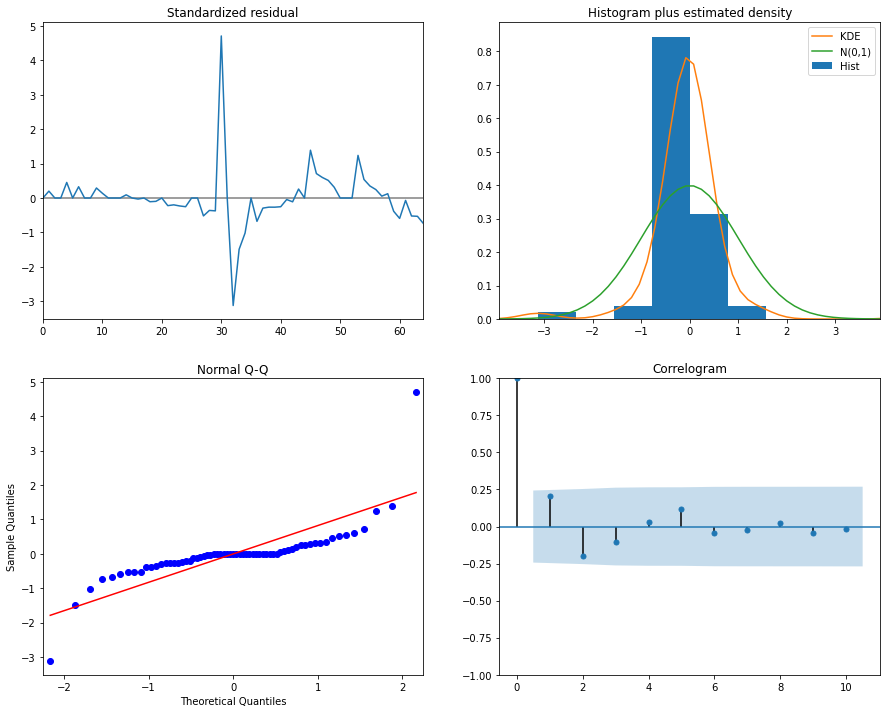

In [28]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

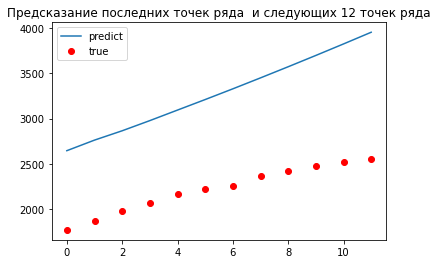

In [29]:
pred_dynamic = resultsb.forecast(12)    #делаем предсказание на 3 точки от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(covid_data['Confirmed'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.plot()
plt.show()

Для подбора оптимальных значений параметров модели временного ряда ARIMA (p, d, q), используем сеточный поиск

In [30]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(3, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения
it = 0
for param in pdq:
#     if it>10:
#         break
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(covid_data['Confirmed'].values[:-2]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
        it +=1
    except:
        continue

ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:73.78038977530842
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:70.5599787317328
ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:61.37931287169306
ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:61.45379462703594
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:66.14598099384493
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:67.66984194853387
ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:86.98841184146234
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:70.0198950363512
ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:79.76183061146489
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:68.23232779887772
ARIMA(1, 0, 5)x[0, 0, 0, 0] - AIC:62.64604960598367
ARIMA(1, 0, 6)x[0, 0, 0, 0] - AIC:63.355255279445565
ARIMA(1, 1, 3)x[0, 0, 0, 0] - AIC:68.40415569532152
ARIMA(1, 1, 4)x[0, 0, 0, 0] - AIC:71.42500721322824
ARIMA(1, 1, 5)x[0, 0, 0, 0] - AIC:79.20682950208058
ARIMA(1, 1, 6)x[0, 0, 0, 0] - AIC:73.51305568990286


Поиск по сетке определяет модель ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:86.98841184146234

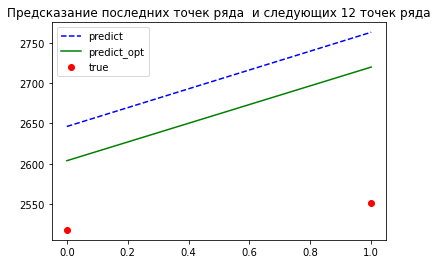

In [31]:
modb_opt = sm.tsa.statespace.SARIMAX(covid_data['Confirmed'].values[:-2],
                               order=[0, 1, 5],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(2)    #делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(2) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(covid_data['Confirmed'].values[-2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.plot()
plt.show()

Улучшеная модель ближе к точкам выборки на отрезке предсказания. Однако общий результат моделирования еще далек от идеала. Проверим остатки модели.

In [32]:
from sklearn.metrics import r2_score 
import math

adf_test = sm.tsa.stattools.adfuller([x for x in resultsb_opt.resid if not math.isnan(x)])
print(adf_test)


(-6.790960575163659, 2.3653919542801555e-09, 0, 44, {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}, 432.1198604777635)


ADF тест (adf_test[1] = 0) показывает, что пока остатки являются стационарным рядом,и хотя модель требует доработки, она отвечает на вопрос о поведении ряда во времени. Это значит, что можно уверенно прогнозировать - значения модели в диапазоне дисперсии остатков.  

## Сохранение модели

In [33]:
resultsb_opt.save('rez_model.h5') # и обратно t_rez = sm.load('rez_model.h5')